# <font color='red'>Ce code entraîne et évalue un réseau de neurones simple </br> pour reconnaître le nombre 5 dans les images de l'ensemble de données MNIST</font>

### Les bibliothèques nécessaires sont importées.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

## Chargement de l'ensemble de données MNIST (x_train, y_train), (x_test, y_test) 

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
## Les images (x_train et x_test) sont redimensionnées (normalisation) pour ne contenir que des pixels noirs ou blancs (0 ou 1) en utilisant un seuil de 127
x_train[x_train < 127] = 1
x_train[x_train >= 127] = 0
x_test[x_test < 127] = 1
x_test[x_test >= 127] = 0

## Function de division d'image

In [4]:
#fonction pour diviser l'image en 4 parties : top_right, top_left, bottom_right, bottom_left
def Divide_By_4(img):
    Height, Width = img.shape
    Divider = Width // 2
    top_right = img[:Divider, :Divider] 
    top_left = img[:Divider, Divider:] 
    bottom_right = img[Divider:, :Divider] 
    bottom_left = img[Divider:, Divider:]

    return top_right, top_left, bottom_right, bottom_left
    
#La fonction Divide_By_4_Again() utilise la fonction Divide_By_4() pour diviser l'image en 16 sous-images
def Divide_By_4_Again(img):
    tr, tl, br, bl = Divide_By_4(img)
    image_reformed = Divide_By_4(tr), Divide_By_4(tl), Divide_By_4(br), Divide_By_4(bl)
    image_reformed = np.asarray(image_reformed)
    image_reformed = image_reformed.reshape(16, 7, 7)
    return image_reformed

## Function de reformalisation de données (utiliser chaque image diviser pour calculer ses pourcentage et les utiliser come donées d'enter)

In [7]:
#La fonction reformulate_Mnist_With_Percentage() prend en entrée un ensemble de données (x) et retourne une liste de pourcentage de pixels noirs pour chaque sous-image , 
#elle fait se travaille sur chaque image de mnist.
def reformulate_Mnist_With_Percentage(x):
    New_Mnist = []
    for i in x:
        img = Divide_By_4_Again(i)
        img_percent = []
        for j in range(16):
            blacks = 0
            for k in range(7):
                for l in range(7):
                    if(img[j][k][l] == 0):
                        blacks += 1
            img_percent.append((blacks / 49) * 100)
        New_Mnist.append(img_percent)
    return New_Mnist

#reformed_x_train et reformed_x_test utilise la fonction reformulate_Mnist_With_Percentage() pour être reformatées 
#pour les utiliser come données d'enter dans le modele

reformed_x_train = reformulate_Mnist_With_Percentage(x_train)
reformed_x_test = reformulate_Mnist_With_Percentage(x_test)

#transformer les donnée en un array numpy
reformed_x_train = np.array(reformed_x_train)
reformed_x_test = np.array(reformed_x_test)


### Définir le modèle

In [8]:

#1 si l'image est un 5, 0 sinon
train_sur_5= (y_train == 5) # creer un array de booleans
test_sur_5= (y_test == 5)

#Le modèle est défini en utilisant keras.Sequential. Il est composé de deux couches :
model = keras.Sequential([
    #La première couche est une couche dense avec 6 neurones et une fonction d'activation relu
    keras.layers.Dense(6, input_shape=(16,), activation='relu'),
    #La deuxième couche est une couche dense avec 1 neurone et une fonction d'activation sigmoid
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    #l'optimiseur 'adam' pour mettre à jour les poids
    optimizer='adam',
    #la fonction de coût 'BinaryCrossentropy' pour calculer la perte
    loss='BinaryCrossentropy',
    #la métrique 'accuracy' pour évaluer la performance
    metrics=['accuracy']
)

#Le modèle est entraîné sur les données d'entraînement (reformed_x_train) et les étiquettes d'entraînement (y_train_five) pendant 3 epochs.
model.fit(reformed_x_train, train_sur_5, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3281 - accuracy: 0.9055
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2061 - accuracy: 0.9302
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1668 - accuracy: 0.9407


In [9]:
## Afficher la précision de test print('\nTest accuracy:', test_acc)
test_loss, test_acc = model.evaluate(reformed_x_test, test_sur_5, verbose=2) 

313/313 - 0s - loss: 0.1264 - accuracy: 0.9559 - 427ms/epoch - 1ms/step


313/313 [==============================] - 0s 928us/step


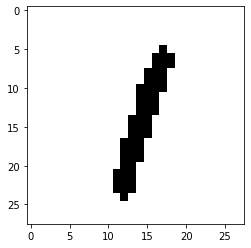

The Model Thinks This is not a 5
313/313 [==============================] - 0s 1ms/step


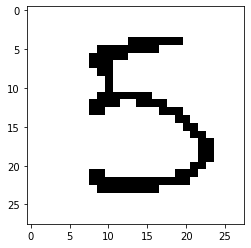

The Model Thinks This is a 5
313/313 [==============================] - 0s 920us/step


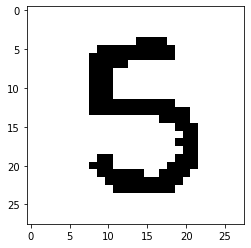

The Model Thinks This is a 5
313/313 [==============================] - 0s 907us/step


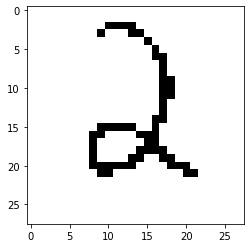

The Model Thinks This is not a 5
313/313 [==============================] - 0s 896us/step


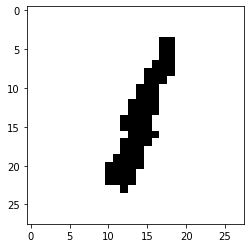

The Model Thinks This is not a 5


In [10]:
#une fonction tester() est définie pour tester les prédictions du modèle sur les données de test.
def tester():
 for i in range(5):
  #demander à l'utilisateur de saisir un numéro de l'image de test
  nbr = int(input())
  #accéder à l'image correspondante
  prediction = model.predict(reformed_x_test)
  #faire la prediction sur cette image.
  prediction[nbr]
  plt.imshow(x_test[nbr], cmap='gray')
  plt.show()
  if (prediction[nbr]> 0.5):
     print("The Model Thinks This is a 5")
  else:
     print("The Model Thinks This is not a 5")
   
tester()